# AUTHOR : GANESH S

## TASK 5 : Perform "Exploratory Data Analysis(EDA) - SPORTS

### Problem Statement :
- Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'
- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.

**NOTE** :   In the below notebook you can see 2 separate analysis for the datasets ( matches.csv and deliveries.csv).

#### IMPORTING THE LIBRARIES THAT ARE REQUIRED FOR DATA ANALYSIS AND VISUALIZATION

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

##  A) Exploratory Data Analysis on matches data.

### 1) CREATING A DATAFRAME AND DISPLAYING FIRST 10 DATA GIVEN

In [2]:
mat_df = pd.read_csv("matches.csv")
mat_df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09/04/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09/04/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10/04/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,11/04/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,12/04/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


### 2) SHAPE OF THE DATA

In [3]:
mat_df.shape

(756, 18)

### 3) THE pd.info( ) function gives details about the columns present, their datatypes and range

In [4]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

> So we see that there are **756 rows** of data in the dataset with majority having object or string like datatype and **18 columns** for analysis purpose.

### 4) CHECKING NULL VALUES IN THE DATA

In [5]:
mat_df.isnull().sum().sort_values(ascending = False)

umpire3            637
city                 7
player_of_match      4
winner               4
umpire1              2
umpire2              2
toss_winner          0
season               0
date                 0
team1                0
team2                0
result               0
toss_decision        0
dl_applied           0
win_by_runs          0
win_by_wickets       0
venue                0
id                   0
dtype: int64

### 5) ANALYZING SOME STATISTICAL VALUE OF THE DATA

In [6]:
mat_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


> From the above statistics we can infer like this
- The maximum number of matches given in the data is 756
- The minimum or inaugral season of IPL was in the year 2008 and latest one was played in the year 2019.
- These are some of the ways in which we can interpret some stats about the matches data.

### 6) THE CORRELATION HEATMAP
- describes the correlation among the columns in data, darker the color indicates greater the correlation among them and vice-versa.

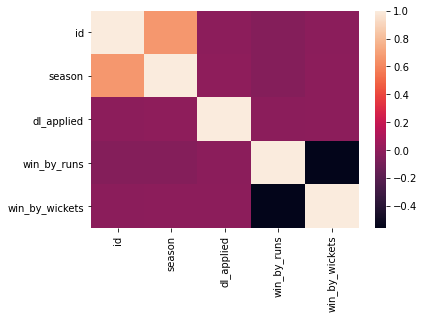

In [7]:
sns.heatmap(mat_df.corr())

### 7) CHECKING  UNIQUE VALUES OF SOME COLUMNS

In [8]:
mat_df["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [9]:
#FOR TEAM 1
mat_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
#FOR TEAM 1
mat_df["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### 8) REPLACING TEAM NAMES WITH LATEST NAMES(AS OF IPL 2019)

In [11]:
mat_df=mat_df.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
mat_df=mat_df.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 
mat_df=mat_df.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 

### 9) SEASON THAT HAD MOST NUMBER OF MATCHES

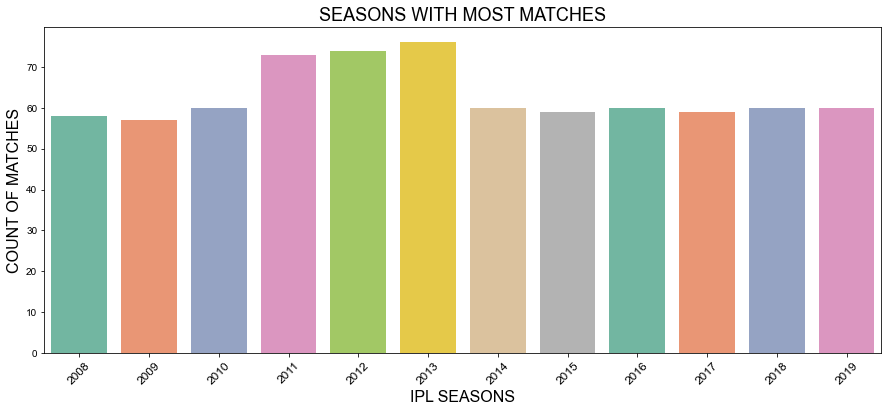

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x="season", data=mat_df,orient="v",palette = "Set2")
sns.set_style("darkgrid")
plt.title("SEASONS WITH MOST MATCHES",fontsize=18)
plt.xlabel("IPL SEASONS",fontsize=16)
plt.ylabel("COUNT OF MATCHES",fontsize=16)
plt.xticks(rotation=45,fontsize=12)
plt.show()

> From the visualization we can see that the **IPL 2013** had the most number of matches followed by IPL 2012 and IPL 2011.

### 10) TOP 10 PLAYERS WINNING MOST NUMBER OF "PLAYER_OF_THE_MATCH" AWARD

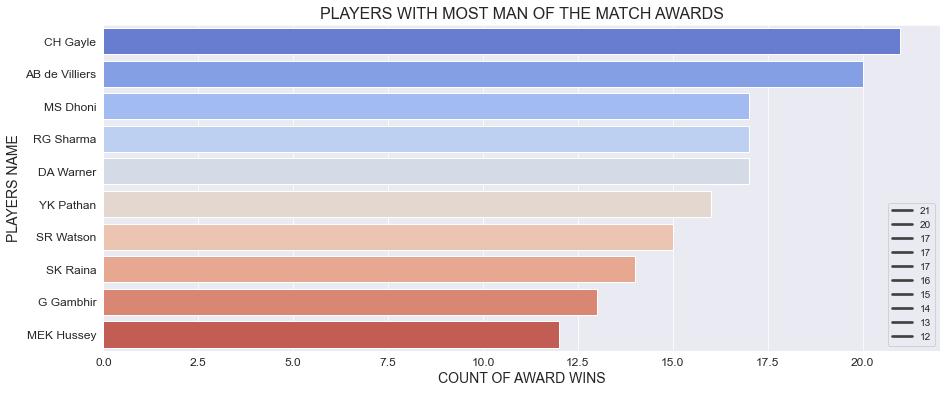

In [13]:
players_top = mat_df.player_of_match.value_counts()[:10]

#VISUALIZATION
plt.figure(figsize=(15,6))
sns.barplot(y = players_top.index, x = players_top, palette="coolwarm")
sns.set_style("darkgrid")
plt.title("PLAYERS WITH MOST MAN OF THE MATCH AWARDS",fontsize=16)
plt.xlabel("COUNT OF AWARD WINS",fontsize=14)
plt.ylabel("PLAYERS NAME",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(players_top)
plt.show()

> From the chart we see that **CHRIS GAYLE** has won the most number of "player of the match awards" with **21 awards** to his name.
- The second player in this list is **Ab De Villiers** with **20 awards**.

### 11) MOST Man Of The Match AWARDS WON BY PLAYER EACH SEASON

In [14]:
import collections 
from collections import defaultdict

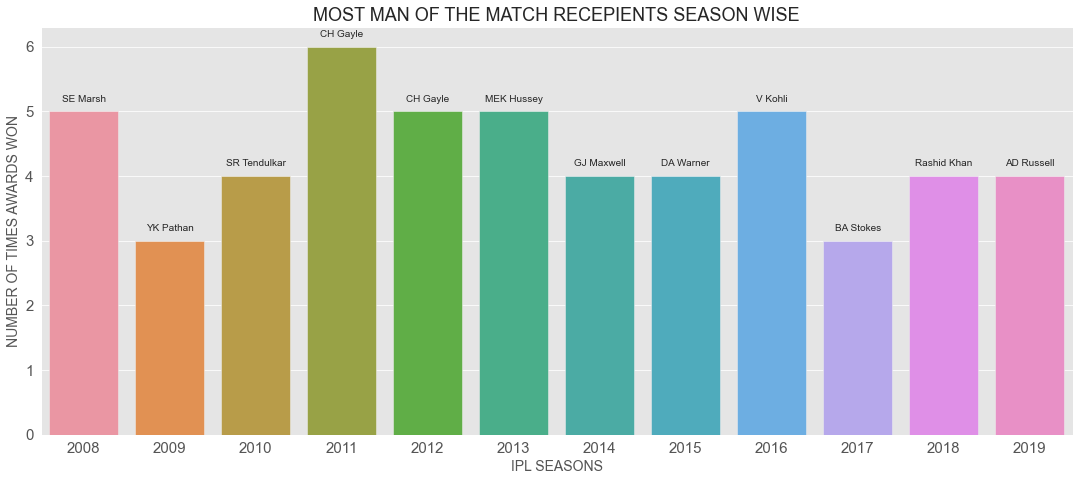

In [15]:
dic = defaultdict(list)
for i in range(0,len(mat_df)):
    #if mat_df.season.iloc[i] not in dic.keys():
    dic[mat_df.season.iloc[i]].append(mat_df.player_of_match.iloc[i])
player=[]
match=[]
year=[]
for i in sorted(dic.keys()):
    ctr=collections.Counter(dic[i])
    d={k: v for k, v in sorted(ctr.items(), key=lambda item: item[1],reverse=True)}
    player.append(list(d.keys())[0])
    match.append(list(d.values())[0])
    year.append(i)
plt.style.use("ggplot")
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.xlabel("IPL SEASONS",fontsize=14)
plt.ylabel("NUMBER OF TIMES AWARDS WON",fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("MOST MAN OF THE MATCH RECEPIENTS SEASON WISE",fontsize=18)
ax=sns.barplot(year,match)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.15,player[count],ha="center") 
    count+=1

> The graph shows who won most player of match awards season wise.
- The maximum that was won is **6 times** by **CHRIS GAYLE** in **2011 IPL season**.

###  12 ) VENUE HOSTING MOST NUMBER OF MATCHES

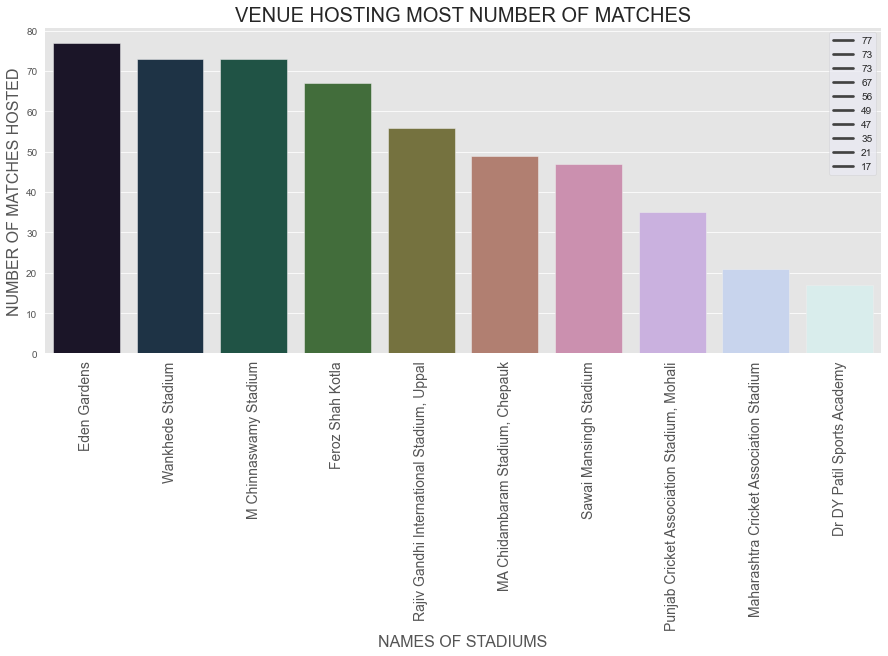

In [16]:
plt.figure(figsize=(15,6))
venue_top = mat_df.venue.value_counts()[:10]

#VISUALIZATION
sns.barplot(y = venue_top, x = venue_top.index,orient="v",palette="cubehelix")
sns.set_style("darkgrid")
plt.title("VENUE HOSTING MOST NUMBER OF MATCHES",fontsize=20)
plt.xlabel("NAMES OF STADIUMS",fontsize=16)
plt.ylabel("NUMBER OF MATCHES HOSTED",fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.legend(venue_top)
plt.show()

> The Venue that has hosted the most number of IPL matches is **EDEN GARDENS** in Kolkata.
- Eden gardens has hosted about **77 matches** in IPL seasons.

 ###  13) WHICH TEAM HAD WON BY MAXIMUM RUNS?

In [17]:
max_runs_wins = mat_df.iloc[mat_df["win_by_runs"].idxmax()]['winner']
print("THE TEAM THAT WON BY MOST RUNS IS :",max_runs_wins)
details = mat_df.iloc[mat_df["win_by_runs"].idxmax()]
print("THE DETAILS OF THAT MATCH ARE :\n",details)

THE TEAM THAT WON BY MOST RUNS IS : Mumbai Indians
THE DETAILS OF THAT MATCH ARE :
 id                               44
season                         2017
city                          Delhi
date                     06/05/2017
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


> The victory margin of **146 runs** while defending is highest in IPL history in the match between **Mumbai Indians and Delhi Capitals**(then Delhi Daredevils).
- This match took place on 6th of May 2017 in the Delhi Capitals homeground of Feroz Shah Kotla.
- The player of the match on that day was **LMP Simmons**.
- Even though Delhi won the toss and chose to field they batted terribly and lost by 146 runs making a history.

### 14) TEAMS WINNING BY 10 WICKETS IN ALL OF IPL SEASONS

In [18]:
ten_wicket_wins = mat_df[mat_df["win_by_wickets"] == 10]
ten_wicket_wins

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,30/04/2017,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,27/04/2008,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,19/04/2009,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,18/03/2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,20/05/2011,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,20/05/2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,10/04/2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,26/04/2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,21/04/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


> From the above statistics we can see that there have been **11 occasions** when the teams batting second have won by **10 wickets**.
- This indicates that the opening batsmens on that particular day performed excellently to chase down the given total without losing a single wicket.

### 15) TOSS DECISION TRENDS BY TEAMS ACROSS ALL SEASONS

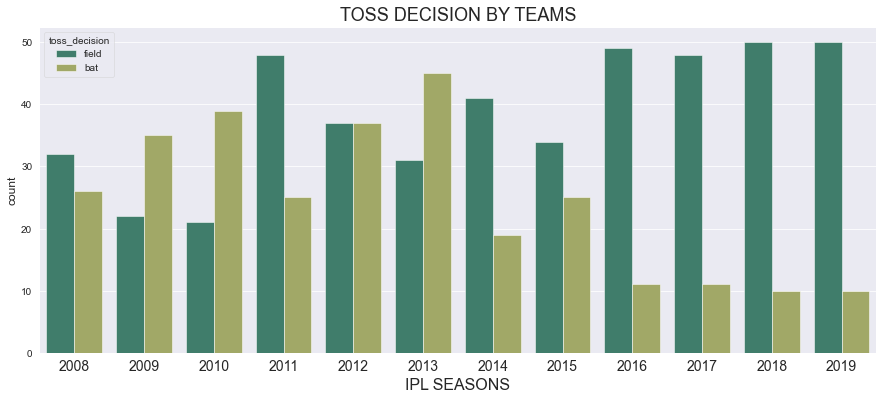

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x="season", hue="toss_decision",data=mat_df,orient="h",palette="gist_earth")
sns.set_style("darkgrid")
plt.title("TOSS DECISION BY TEAMS",fontsize=18)
plt.xlabel("IPL SEASONS",fontsize=16)
plt.xticks(rotation="horizontal",fontsize=14)
plt.show()

> The above visualization shows trend in Toss Decision by teams over the years.
- From the graph we see that in the **IPL seasons 2009,2010, 2013** the team winning the toss chose to **BAT first**. This tells us that teams preferred **defending a total** more.
- **IPL SEASON 2012** is  unique season where we can see there almost 50 % matches where toss decision was to field and almost 50 % where toss decision was to bat first.
- In the rest of IPL SEASONS the team that won the toss always chose to **FIELD first** indicating that **chasing a total** was the trend.

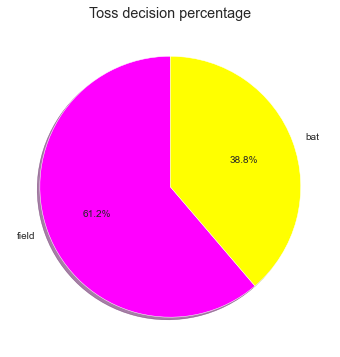

In [20]:
plt.figure(figsize=(15,6))
toss_decision_value = mat_df.toss_decision.value_counts()
labels = (np.array(toss_decision_value.index))
sizes = (np.array((toss_decision_value / toss_decision_value.sum())*100))
colors = ["magenta","yellow"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

> The pie chart depicts that in general in IPL
- **61.2 %** the team winning the toss choses to **field first**.
- **38.8 %** the team winning the toss decides to **bat first**.

### 16) MOST TOSS WINNING TEAMS

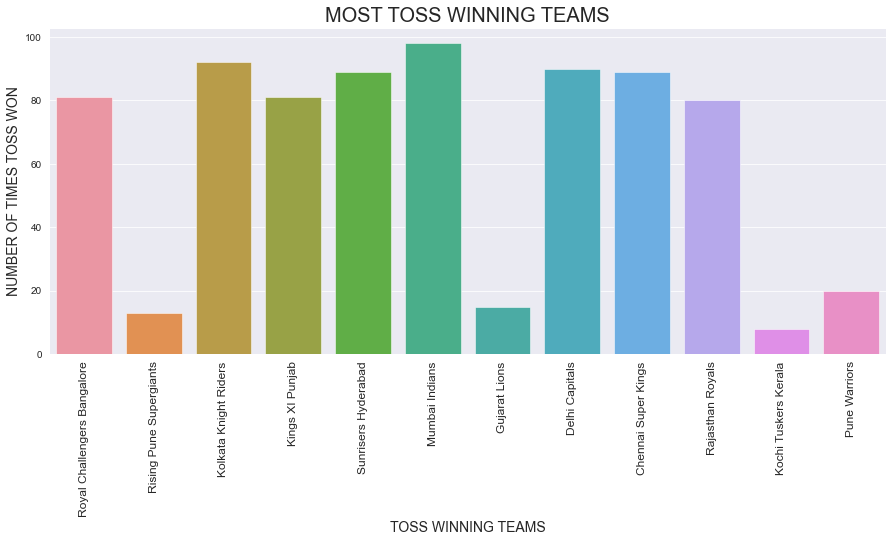

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x="toss_winner", data=mat_df,orient="v")
sns.set_style("darkgrid")
plt.title("MOST TOSS WINNING TEAMS",fontsize=20)
plt.xlabel("TOSS WINNING TEAMS",fontsize=14)
plt.ylabel("NUMBER OF TIMES TOSS WON",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.show()

> From the graph we see that **Mumbai Indians** is the team who have won the toss decision most number of times followed by **Kolkata Knight Riders**.

### 17) IS TOSS WINNING TEAM ALWAYS THE MATCH WINNER ??

False    363
True     393
dtype: int64


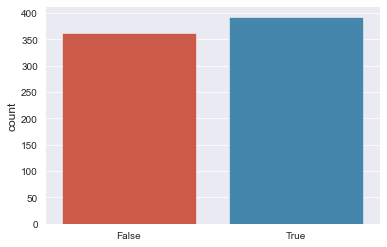

In [22]:
toss_and_match_win = mat_df["toss_winner"] == mat_df["winner"]
print(toss_and_match_win.groupby(toss_and_match_win).size())
sns.countplot(toss_and_match_win)

> This is an interesting point in the analysis. 
- We can see that out of the matches that have been played , **393 times** the team that won the toss also won the match.
- But the almost close to **363 times** the result did not go in the way of the team winning the toss.

### 18) TEAMS WINNING MOST NUMBER OF MATCHES SEASON WISE

In [23]:
wins_per_season = mat_df.groupby('season')['winner'].value_counts()
wins_per_season.head(30)

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Sunrisers Hyderabad             2
2009    Delhi Capitals                 10
        Royal Challengers Bangalore     9
        Sunrisers Hyderabad             9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Royal Challengers Bangalore     8
        Sunrisers Hyderabad             8
        Delhi Capitals                  7
        Kolkata Knight Riders           7
        Rajasthan Royals                

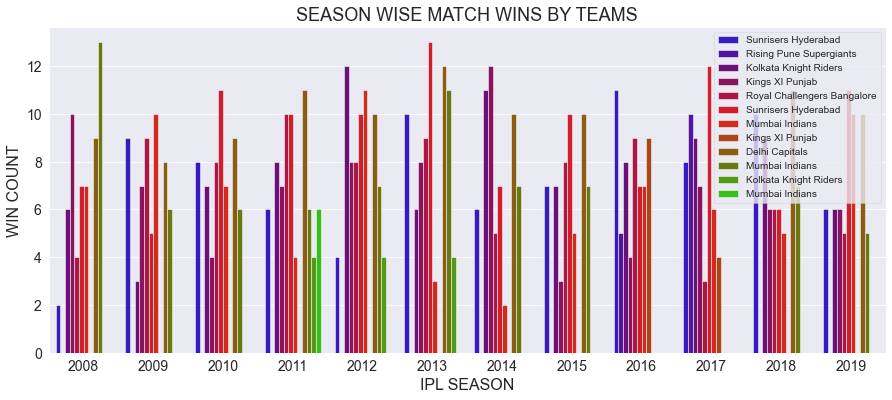

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x="season",hue="winner",data=mat_df, palette="brg")
plt.title("SEASON WISE MATCH WINS BY TEAMS",fontsize=18)
plt.xlabel("IPL SEASON",fontsize=16)
plt.ylabel("WIN COUNT",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(mat_df["winner"],loc="upper right")

> The graph shows which team won the most number of matches in IPL season wise. 
- The team with most victories is eventually the season winner.

### 19) MOST SUCCESSFUL TEAMS IN IPL / TEAMS WINNING MOST NUMBER OF MATCHES

In [25]:
champion_teams = mat_df["winner"].value_counts()

champions_win_df = pd.DataFrame(columns=["TEAM NAME", "NUMBER OF WINS"])
for items in champion_teams.items():
    champions_df1 = pd.DataFrame({ "TEAM NAME":[items[0]], "NUMBER OF WINS":[items[1]] })
    champions_win_df = champions_win_df.append(champions_df1, ignore_index=True)

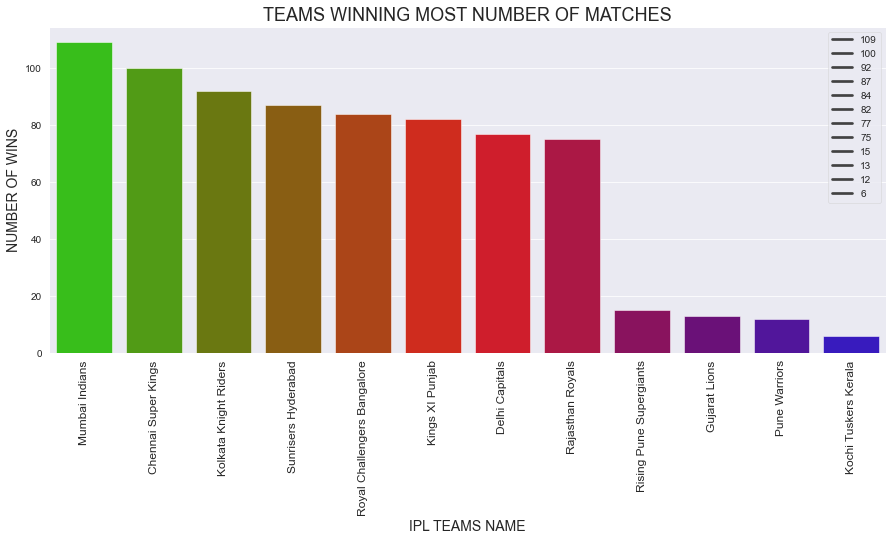

In [26]:
plt.figure(figsize=(15,6))
plt.title("Total Victories of IPL Teams")
sns.barplot(x="TEAM NAME", y="NUMBER OF WINS", data=champions_win_df,palette="brg_r");
plt.title("TEAMS WINNING MOST NUMBER OF MATCHES",fontsize=18)
plt.xlabel("IPL TEAMS NAME",fontsize=14)
plt.ylabel("NUMBER OF WINS",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.legend(champions_win_df["NUMBER OF WINS"])
plt.show()
#cubehelix / CMRmap / Accent/Dark2

>  From the graph we can see that **MUMBAI INDIANS** have won the most number of matches. THEY HAVE  **109 matches wins** in all ipl seasons.
> - Followed by them are  **CHENNAI SUPER KINGS** AND **KOLKATA KNIGHT RIDERS** who have won  100 &  92 matches respectively.
> - Also from the chart we can see that **MUMBAI INDIANS & CHENNAI SUPER KINGS** are the only 2 teams to have crossed **100 Team Wins** mark in IPL among the other teams.

### 20) UMPIRES WHO HAVE STOOD FOR MOST IPL MATCHES

In [27]:
umpire1 = mat_df["umpire1"].value_counts()
umpire2 = mat_df["umpire2"].value_counts()
umpire3 = mat_df["umpire3"].value_counts()
umpires_df = pd.concat([umpire1, umpire2,umpire3], axis=1)
umpire_list = umpires_df.sum(axis=1)

top_umpires = pd.DataFrame(columns=["UMPIRE NAME", "MATCHES STOOD"])

for items in umpire_list.items():
    temp_df1 = pd.DataFrame({"UMPIRE NAME":[items[0]], "MATCHES STOOD":[items[1]] })
    top_umpires= top_umpires.append(temp_df1, ignore_index=True)[:10]
top_umpires.sort_values("MATCHES STOOD",ascending=False)

,UMPIRE NAME,MATCHES STOOD
2,S Ravi,114.0
0,HDPK Dharmasena,87.0
3,AK Chaudhary,58.0
7,M Erasmus,54.0
8,Nitin Menon,52.0
1,Asad Rauf,51.0
6,BR Doctrove,42.0
9,RE Koertzen,41.0
4,Aleem Dar,38.0
5,BF Bowden,37.0


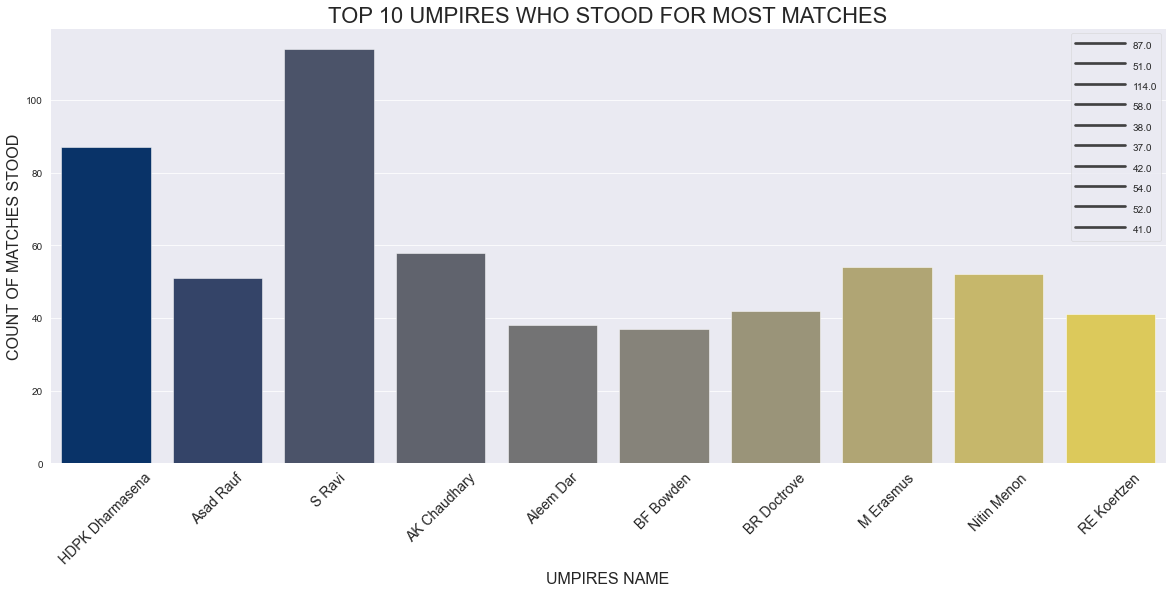

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x="UMPIRE NAME",y="MATCHES STOOD",data=top_umpires,palette="cividis",saturation=0.85)
plt.title("TOP 10 UMPIRES WHO STOOD FOR MOST MATCHES",fontsize=22)
plt.xlabel("UMPIRES NAME",fontsize=16)
plt.ylabel("COUNT OF MATCHES STOOD",fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.legend(top_umpires["MATCHES STOOD"],handlelength=5, handleheight=2)
plt.show()

> So from above analysis we see that umpire **S Ravi** has stood for most number for IPL matches.
- He is also the only umpire to stand for 100+ IPL matches with **114 matches** to his name.
- Sri Lankan umpire **HDPK Dharmasena** who has stood for **87 matches** is the second person in this list.

### 21) USE OF DUCKWORTH-LEWIS-STERN ( DLS ) METHOD IN IPL

In [29]:
dl_method_done = mat_df.groupby("season")["dl_applied"].value_counts()
print(dl_method_done.head(30))

season  dl_applied
2008    0             56
        1              2
2009    0             54
        1              3
2010    0             60
2011    0             70
        1              3
2012    0             74
2013    0             76
2014    0             59
        1              1
2015    0             57
        1              2
2016    0             56
        1              4
2017    0             58
        1              1
2018    0             57
        1              3
2019    0             60
Name: dl_applied, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

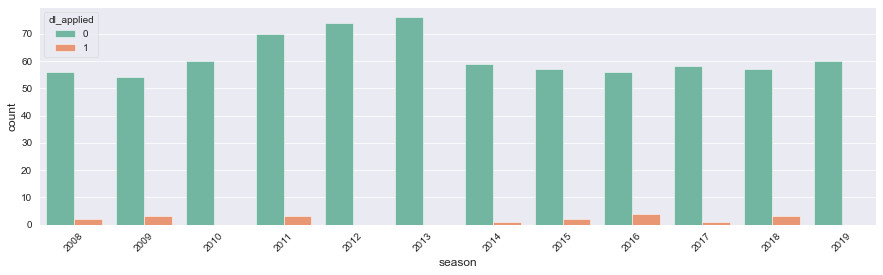

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(x="season", hue="dl_applied",data=mat_df,palette="Set2")
sns.set_style("darkgrid")
plt.xticks(rotation=45)
#palette=Set2,PuRd

> Although a very rare sight, the DL-method is generally used when there has been an interruption in the match and the match was stopped due to some reason.
- For example there have been occassions in IPL when rain has played its part in ruining the ongoing match. Due to which the score to be chased was revised using the DLS method for that particular match.
- From the above visualization we can see that the DLS method is not used for most of IPL matches.
- Only in the **IPL 2016** the DLS method was used **4 times** in changing the score. Other than the IPL 2009,2011 and 2018 the DLS method was used 3 times.

### 22) IPL CHAMPIONS YEAR-WISE

In [31]:
blank = []
for data in mat_df.groupby("season"):
    if data[1].tail(1).winner.values[0] == data[1].tail(1).team1.values[0]:
        runners_up = data[1].tail(1).team2.values[0]
    else:
        runners_up = data[1].tail(1).team1.values[0]
    blank.append([data[0],data[1].tail(1).winner.values[0],runners_up])

season_winners = pd.DataFrame(blank,columns=["Season","Winner","Runners_up"])
print(season_winners)

    Season                 Winner                   Runners_up
0     2008       Rajasthan Royals          Chennai Super Kings
1     2009    Sunrisers Hyderabad  Royal Challengers Bangalore
2     2010    Chennai Super Kings               Mumbai Indians
3     2011    Chennai Super Kings  Royal Challengers Bangalore
4     2012  Kolkata Knight Riders          Chennai Super Kings
5     2013         Mumbai Indians          Chennai Super Kings
6     2014  Kolkata Knight Riders              Kings XI Punjab
7     2015         Mumbai Indians          Chennai Super Kings
8     2016    Sunrisers Hyderabad  Royal Challengers Bangalore
9     2017         Mumbai Indians      Rising Pune Supergiants
10    2018    Chennai Super Kings          Sunrisers Hyderabad
11    2019         Mumbai Indians          Chennai Super Kings


In [32]:
import plotly
import plotly.express as px

In [33]:
IPL_winners = season_winners["Winner"].value_counts().to_frame().reset_index().rename(columns = {"index" : "Winner_Team" , "Winner" : "Count"})
px.pie(IPL_winners , values="Count", names="Winner_Team", title="IPL CHAMPIONS WIN PERCENT", color_discrete_sequence=px.colors.sequential.RdBu)

> The statistics above shows the season wise IPL title winners since the 2008 inaugral IPL edition.
The pie chart has been plotted to see the percentage of IPL teams that have won the trophy.
- From the Pie chart we see the following observations.
- **MUMBAI INDIANS** is the team who have won the most number of IPL trophies and have a winning percent of **33.3%** the highest among other teams.They have won the trophy **4 times** in the years 2013,2015,2017 and 2019 IPL editions.
- **CHENNAI SUPER KINGS** have won the trophy **3 times** in the years 2010,2011 & 2018 IPL editions.They have a win percent of **25%** the second most among other teams.
- **SUNRISERS HYDERABAD & KOLKATA KNIGHT RIDERS** have both won the IPL trophy twice.While **Sunrisers Hyderabad** won in the IPL years of 2009 and 2016, **Kolkata Knight Riders** won in the years 2012 and 2014 IPL editions. They both have a win percent of **16.2%**. 
- **RAJASTHAN ROYALS** won the IPL once in the inaugral edition of 2008. So they have a win percent of **8.33%**.

### IPL RUNNERS_UP THROUGHOUT THE YEARS

In [34]:
IPL_winners = season_winners["Runners_up"].value_counts().to_frame().reset_index().rename(columns = {"index" : "Runners_up_Team" , "Runners_up" : "Count"})
px.pie(IPL_winners , values="Count", names="Runners_up_Team", title="IPL RUNNERS-UP THROUGHOUT THE YEARS", color_discrete_sequence=px.colors.sequential.Plasma)

> The pie chart in the above visualization depicts the following.
- From the chart we see that **CHENNAI SUPER KINGS** have been the most experienced and unfortunate teams in IPL to have featured in almost every IPL finals.
- Chennai is the only team who have played as much as 8 IPL finals among the 12 IPL finals that have been played. Also we have to note that for IPLs 2016,2017 they were given a 2 year ban so they could not play in those IPLs. Had they played those IPLs the stats might have been different now.
- As a result they have the highest percentage of being the Runners-Up team in IPL with **41.7% in 5 out 8 IPL finals** they have played in the 12 IPL editions.
- Although they are very far away from Chennai, **ROYAL CHALLENGERS BANGALORE** have **runners-up percent of 25%** among the other teams. They have been in IPL finals for **3 times** and they have lost all 3 times.They have been one of the unluckiest teams in IPL to have played 3 finals and lost all of them.
- The teams **SUNRISERS HYDERABAD,MUMBAI INDIANS,KINGS XI PUNJAB** have been runners-up only once in the finals they have played.They all have a runners-up percent of **8.33%**.
- The intermediate team **RISING PUNE SUPERGIANTS** who played for 2 years in the years 2016,2017 of IPL reached the IPL final in the year 2017 but lost to **MUMBAI INDIANS**. So they too have a runners-up percent of **8.33%**.

## B) Exploratory Data Analysis on deliveries data.

### 1) CREATING A DATAFRAME AND DISPLAYING FIRST 10 DATA GIVEN

In [35]:
runs_df = pd.read_csv("deliveries.csv")
runs_df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


### 2) SHAPE OF THE DATA

In [36]:
runs_df.shape

(179078, 21)

### 3) THE pd.info( ) function gives details about the columns present, their datatypes and range

In [37]:
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

> The above statistics shows that there **179078 rows** of data and **21 columns** for analysis.
- Most of the data in this data are of integer type and others being of object type.

### 4) CHECKING NULL VALUES IN THE DATA

In [38]:
runs_df.isnull().sum().sort_values(ascending = False)

fielder             172630
player_dismissed    170244
dismissal_kind      170244
bowler                   0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
wide_runs                0
is_super_over            0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
match_id                 0
dtype: int64

> Other than the 3 columns shown above all the other columns have 0 null values indicating that we dont need to fill in some null data for those rows.
- To note that the above 3 columns of **fielder**, **player_dismissed** and **dismissal_kind** are having many null values because these columns are basically representing the wickets taken.
- We know that not all the deliveries bowled in IPL or any match will be a wicket.

### 5) ANALYZING SOME STATISTICAL VALUE OF THE DATA

In [39]:
runs_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


> We can interpret the above statistics as follows:
- The average number of wide runs given in a match is around 0.2511 which says 0.2511 runs in a particular are due to wide balls bowled. Similar can be applied for other columns of the data.
- The maximum number of balls that has been bowled in an over is 9 by some bowler whereas the alloted quota is 6 in general. This means he has bowled some extra delivieries like wide or no-balls etc.
- 75% of the balls bowled in the match are always a legal delivery.
- In similar way we can infer for other columns in the deliveries data.

### 6) THE CORRELATION HEATMAP
- describes the correlation among the columns in data, darker the color indicates greater the correlation among them and vice-versa.

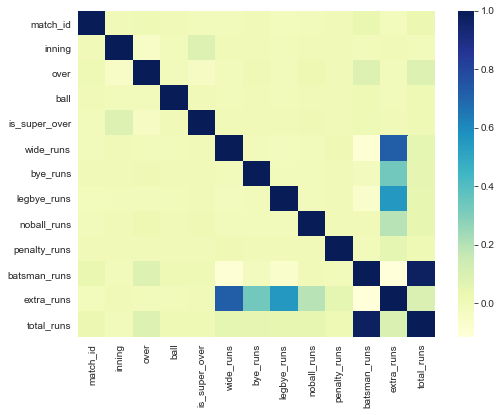

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(runs_df.corr(),cmap="YlGnBu")
plt.show()

> From the heatmap we can see that the columns in the heatmap hardly correlated to each other.
- The column **"Extra_runs"** is the only one who has some relation with other columns like wide_runs, no_ball runs etc because this columns is made up using such columns.

### 7) BATSMAN WITH MOST NUMBER OF RUNS IN IPL

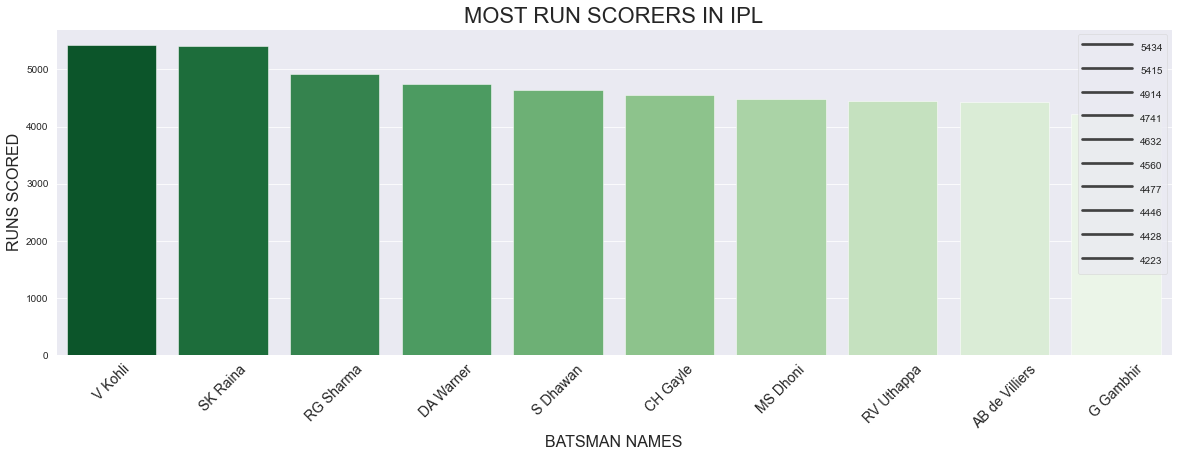

In [41]:
most_runs_IPL = runs_df.groupby("batsman")["batsman_runs"].agg("sum").reset_index().sort_values(by="batsman_runs", ascending=False).reset_index(drop=True)
most_runs_IPL = most_runs_IPL.iloc[:10,:]

#VISUALIZATION
plt.figure(figsize=(20,6))
sns.barplot(x="batsman",y="batsman_runs",data=most_runs_IPL,palette="Greens_r")
plt.title("MOST RUN SCORERS IN IPL",fontsize=22)
plt.xlabel("BATSMAN NAMES",fontsize=16)
plt.ylabel("RUNS SCORED",fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.legend(most_runs_IPL["batsman_runs"],handlelength=5, handleheight=2.5)
plt.show()

> From the above bar graph its clearly shown that **VIRAT KOHLI** is the batsman who has scored most number of runs in IPL. He has scored about **5434 runs** in all of the IPL seasons that he has played.
- Followed by him and is the only player to be in the 5000+ runs list is **SURESH RAINA** who has scored around **5415 runs** in all the IPL seasons he has featured.

### 8) 4's  AND 6's OVER THE YEARS IN IPL

In [42]:
batsmen = mat_df[["id","season"]].merge(runs_df, left_on = "id", right_on = "match_id", how = "left")

#FOR NUMBER OF 6s
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()

#FOR NUMBER OF 4s
fours=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()

Season_boundaries=Season_boundaries.merge(fours,left_on="season",right_on="season",how="left")

Season_boundaries=Season_boundaries.rename(columns={"batsman_runs_x":'6"s','batsman_runs_y':'4"s'})


THE COUNT OF 4s AND 6s OVER THE YEARS IN IPL 

     season  6"s   4"s
0     2008  623  1703
1     2009  508  1321
2     2010  587  1709
3     2011  639  1916
4     2012  733  1911
5     2013  681  2054
6     2014  715  1563
7     2015  692  1611
8     2016  639  1633
9     2017  706  1612
10    2018  869  1674
11    2019  778  1685


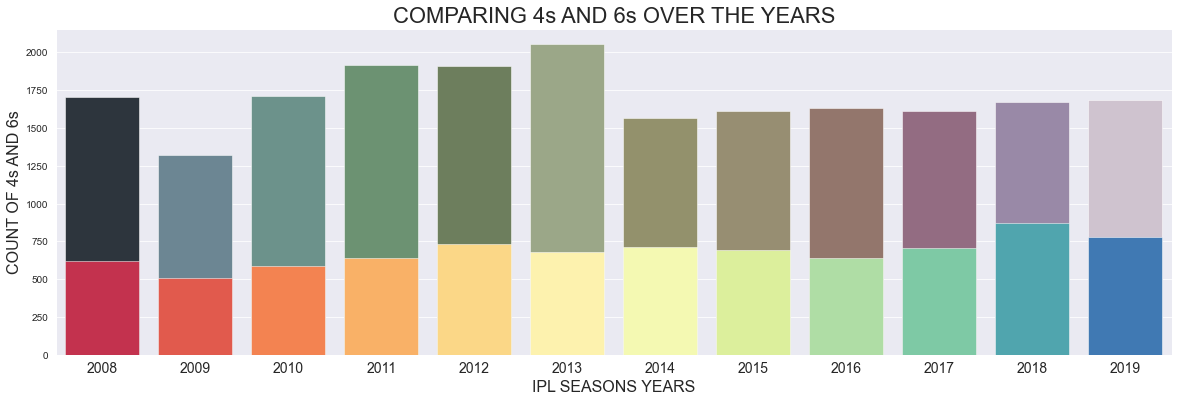

In [43]:
print("THE COUNT OF 4s AND 6s OVER THE YEARS IN IPL \n\n",Season_boundaries)

plt.figure(figsize=(20,6))
#PLOT FOR 4s
sns.barplot(x=Season_boundaries['season'],y=Season_boundaries['4"s'],data=Season_boundaries,palette="gist_ncar", saturation=0.15)
#PLOT FOR 6s
sns.barplot(x=Season_boundaries['season'],y=Season_boundaries['6"s'],data=Season_boundaries,palette="Spectral", saturation=0.95)
plt.title("COMPARING 4s AND 6s OVER THE YEARS",fontsize=22)
plt.xlabel("IPL SEASONS YEARS",fontsize=16)
plt.ylabel("COUNT OF 4s AND 6s",fontsize=16)
plt.xticks(fontsize=14)
plt.show()

> The graph above is comparison graph for number of 4s and 6s hit in IPL over the years.
- The upper side of the graph shows count of 4s and lower half shows 6s count across all seasons.
- We can see that maximum number of 4s were hit in the **2013 IPL EDITION** with an huge number of **2054 boundaries** in the matches played in that season.
- Also it is seen that the 2000+ 4s were hit only once in the 12 IPL seasons that has been played as shown in 2013 edition.
- The most sixes that were hit in an IPL edition is in the **2018 IPL** with about **869 sixes** being hit in only that season which is the most for 6s among all the IPLs that have been conducted.
- From the graph we can conclude that players score more 4s than 6s in any edition of IPL season.

### 9) PLAYERS WHO HAVE HIT THE MOST SIXES IN IPL

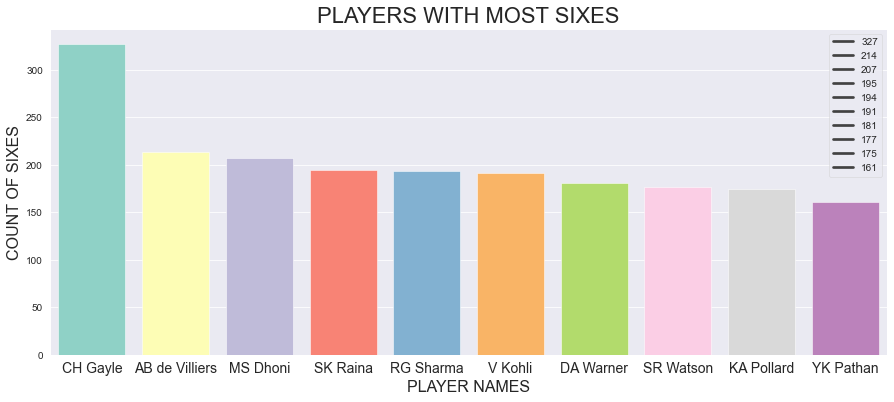

In [44]:
most_sixes = batsmen.groupby("batsman")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
most_sixes= most_sixes.iloc[:10,:]
#print(most_sixes)

plt.figure(figsize=(15,6))
sns.barplot(x="batsman",y="batsman_runs",data=most_sixes,palette="Set3", saturation=0.95)
plt.title("PLAYERS WITH MOST SIXES",fontsize=22)
plt.xlabel("PLAYER NAMES",fontsize=16)
plt.ylabel("COUNT OF SIXES",fontsize=16)
plt.legend(most_sixes["batsman_runs"])
plt.xticks(fontsize=14)
plt.show()

> **""CHRIS GAYLE""** is the only player to hit **300+ IPL sixes** in the seasons he has featured. He has hit about **327 sixes** in all the matches that he has played.
- **AB DE VILLIERS** and **MS DHONI** are the players in 2nd and 3rd position to cross 200+ mark with figures of **214 sixes** and **207 sixes** to their names as shown.

### 10) PLAYERS WITH MOST NUMBER OF FOURS TO THEIR NAME IN IPL

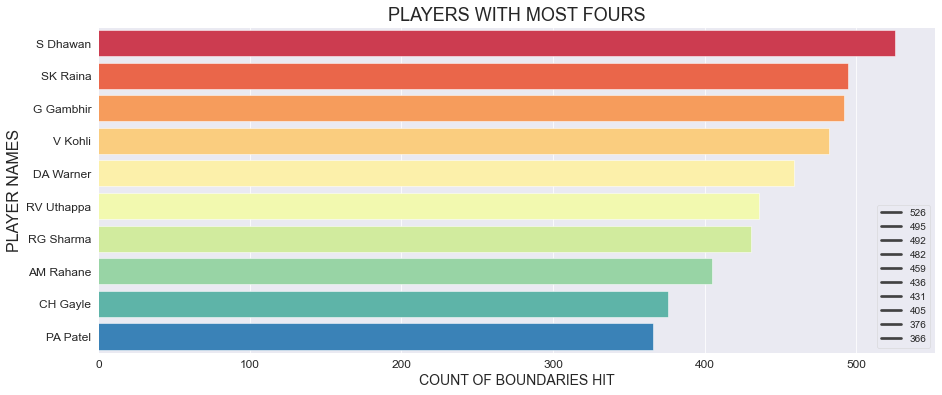

In [45]:
most_fours = batsmen.groupby("batsman")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index().sort_values(by="batsman_runs", ascending=False).reset_index(drop=True)
most_fours= most_fours.iloc[:10,:]
#print(most_fours)

#VISUALIZATION
plt.figure(figsize=(15,6))
sns.barplot(x="batsman_runs",y="batsman",data=most_fours,palette="Spectral", saturation=0.95)
plt.title("PLAYERS WITH MOST FOURS",fontsize=18)
plt.ylabel("PLAYER NAMES",fontsize=16)
plt.xlabel("COUNT OF BOUNDARIES HIT",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(most_fours["batsman_runs"])
plt.show()

> **""SHIKHAR DHAWAN""** is the batsman who has hit most number of 4s in IPL with **526 fours** in IPL which is the highest till date.
- Followed by him are **Suresh Raina** and **Gautam Gambhir** at **495** and **492** boundaries each in their IPL career.

### 11) MOST DISMISSAL KINDS IN ALL OF IPL

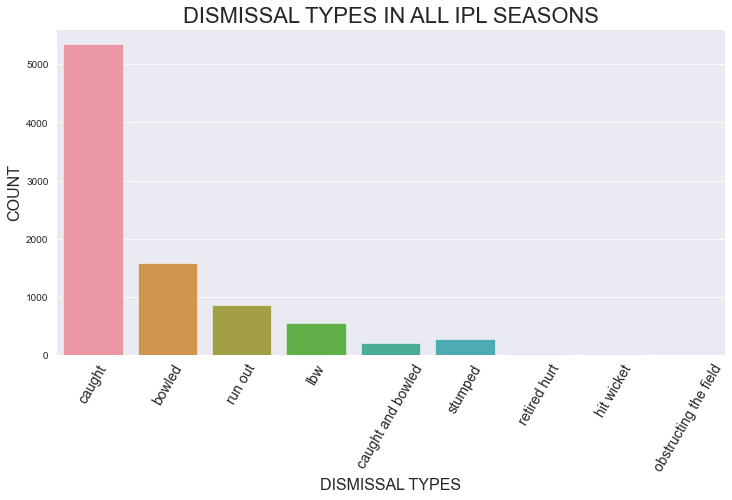

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x="dismissal_kind", data=runs_df)
plt.title("DISMISSAL TYPES IN ALL IPL SEASONS",fontsize=22)
plt.xlabel("DISMISSAL TYPES",fontsize=16)
plt.ylabel("COUNT",fontsize=16)
plt.xticks(rotation=60,fontsize=14)
plt.show()

> The most common dismissal method in IPL is **CAUGHT-BY** which is also one of the easiest ways to take wicket of a batsman.
- We can see that of the dismissals that has taken place almost 5000 of them have been caught by some fielder.
- The second most common way of dismissig a batsman has been **"wickets bowled"** by the bowlers with close to a  count of 1500+ times to take place.
- **Run-outs**,**LBWs** and **caught-bowled** occur less than compared to the other methods.
- We can hardly see any spikes in the graph for **Hit-wicket**,**retired-hurt** and **obstructing the field** because they hardly ever take place in any cricket match. Although there might have been some instances where batsman could not play further due to these reasons.

### 12) MOST WICKET TAKERS IN IPL HISTORY

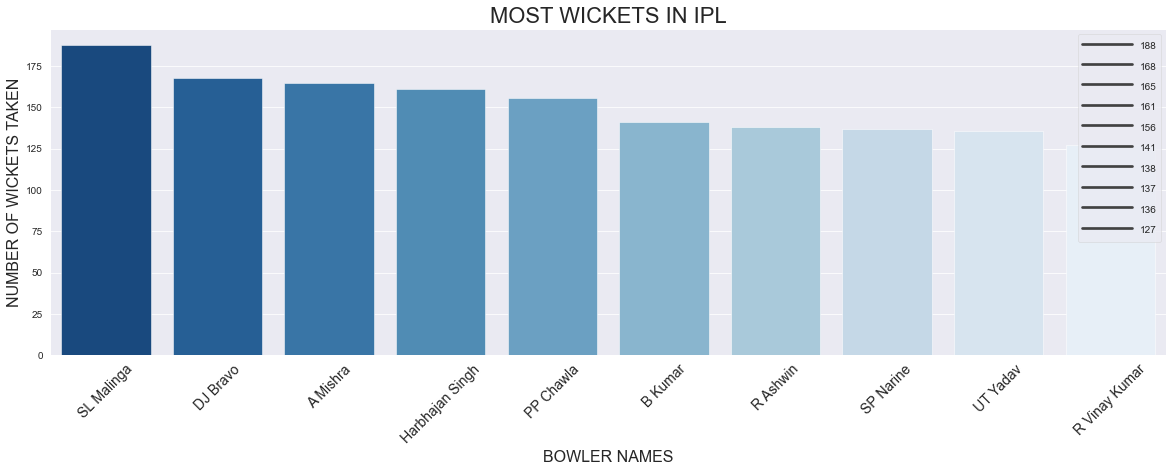

In [47]:
most_wickets_IPL = runs_df.groupby("bowler")["dismissal_kind"].agg("count").reset_index().sort_values(by="dismissal_kind", ascending=False).reset_index(drop=True)
most_wickets_IPL = most_wickets_IPL.iloc[:10,:]

#VISUALIZATION
plt.figure(figsize=(20,6))
sns.barplot(x="bowler",y="dismissal_kind",data=most_wickets_IPL,palette="Blues_r")
plt.title("MOST WICKETS IN IPL",fontsize=22)
plt.xlabel("BOWLER NAMES",fontsize=16)
plt.ylabel("NUMBER OF WICKETS TAKEN",fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.legend(most_wickets_IPL["dismissal_kind"],handlelength=5, handleheight=2)
plt.show()

> The graph above says that **"LASITH MALINGA"** is the highest wicket taker in all IPL seasons. He has taken about **188 wickets** in all of the matches that he has played in IPL.
- The 2nd and 3rd bowlers to take most wickets are **DJ BRAVO** and **AMIT MISHRA** with **168 wickets** and **165 wickets** to their names respectively.

### 13) TOP 10 FIELDERS OF ALL TIME

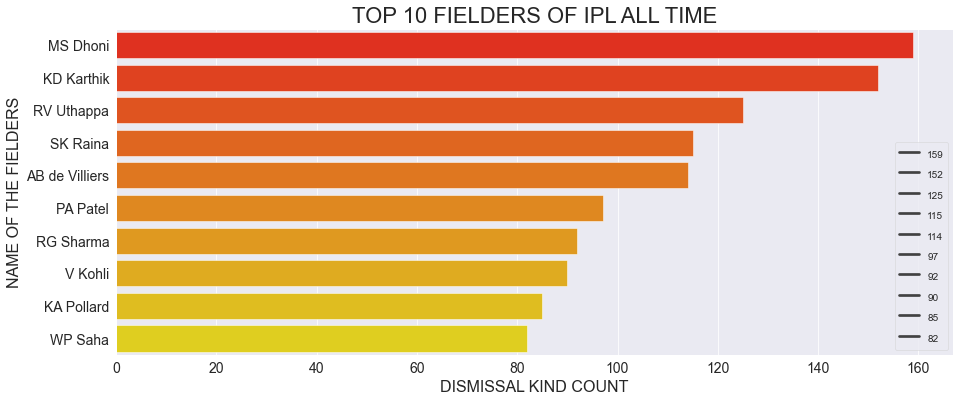

In [48]:
fielders_df = runs_df.groupby("fielder")["dismissal_kind"].agg("count").reset_index().sort_values(by="dismissal_kind",ascending=False)
fielders_df = fielders_df.iloc[:10,:]

#VISUALIZATION
plt.figure(figsize=(15,6))
sns.barplot(x=fielders_df["dismissal_kind"],y=fielders_df["fielder"],data=fielders_df,palette="autumn")
plt.title("TOP 10 FIELDERS OF IPL ALL TIME",fontsize=22)
plt.xlabel("DISMISSAL KIND COUNT",fontsize=16)
plt.ylabel("NAME OF THE FIELDERS",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(rotation="horizontal",fontsize=14)
plt.legend(fielders_df["dismissal_kind"],handlelength=2, handleheight=2)
plt.show()

> The above visualization is made based on the fielder either **taking a catch**, or **run-out** or doing a **stumping as a keeper** methods. Also these are the only ways through which a fielder completes a wicket dimissal.
- From the graph we clearly see that **MS DHONI** tops this chart by dismising players **159 times** through either of the above mentioned method.
- 2nd to him is **Dinesh Kartik** followed by **Robin Uthappa** at 3rd place.

### 14) PLAYERS WHO HAVE BOWLED MOST NUMBER OF OVERS IN IPL

In [49]:
## FOR MOST BALLS
#most_balls_bowler_df = runs_df.groupby("bowler")["ball"].agg("count").reset_index().sort_values(by="ball", ascending=False).reset_index(drop=True)
most_overs_bowler_df = runs_df.groupby("bowler")["ball"].agg(lambda x: (x//6).sum()).reset_index().sort_values(by="ball", ascending=False).reset_index(drop=True)
most_overs_bowler_df = most_overs_bowler_df.iloc[:10,:]

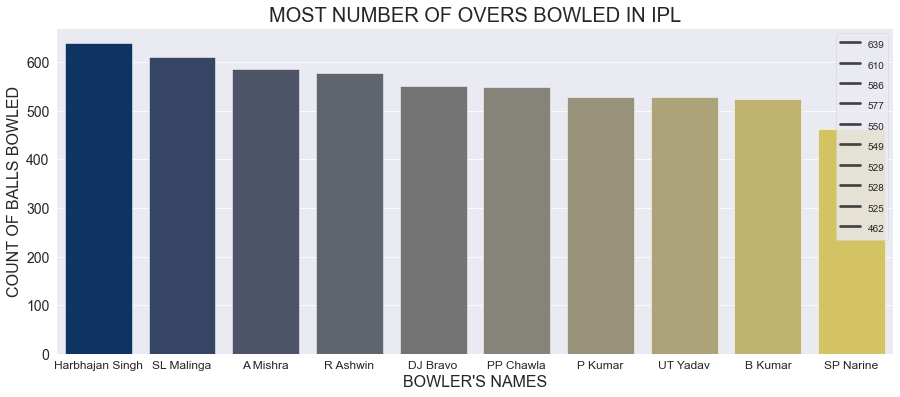

In [50]:
#VISUALIZATION
plt.figure(figsize=(15,6))
sns.barplot(x = most_overs_bowler_df["bowler"], y = most_overs_bowler_df ["ball"],data = most_overs_bowler_df ,palette="cividis")
plt.title("MOST NUMBER OF OVERS BOWLED IN IPL",fontsize=20)
plt.xlabel("BOWLER'S NAMES",fontsize=16)
plt.ylabel("COUNT OF BALLS BOWLED",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation="horizontal",fontsize=14)
plt.legend(most_overs_bowler_df["ball"],handlelength=2, handleheight=2)
plt.show()

> The above graph shows top 10 bowlers who have bowled most number of overs in IPL seasons conducted so far.
- Topping this chart is **""HARBHAJAN SINGH""** who has bowled a whopping **639 overs** in IPL career. With this value you can see how much experience he brings with him to the next IPL. Having him in your team will be valuable asset anytime.
- **Lasith Malinga** is the 2nd most experienced bowler with bowling over **610 overs** in his IPL career. We can also see his name in th first place in most wickets taken making him the most dangerous bowler and an invaluable asset to the team he plays for.

### 15) TOP BOWLERS WHO HAVE BOWLED MOST DOT BALLS IN IPL

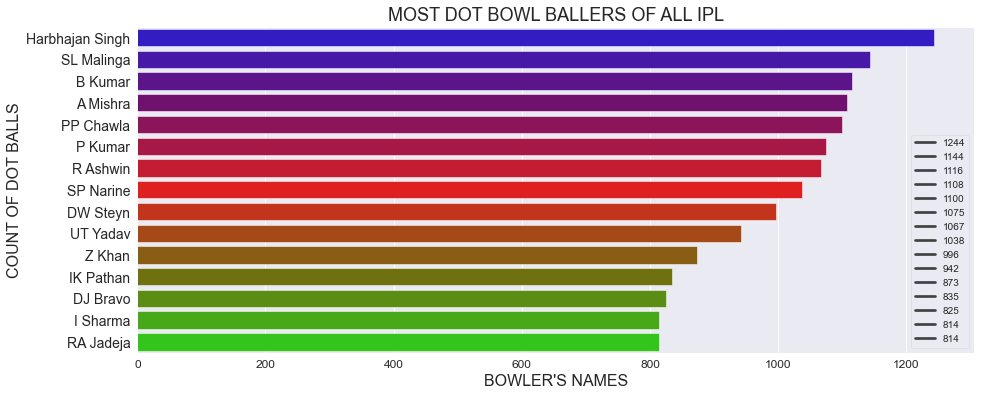

In [51]:
dot_balls_df = runs_df.groupby("bowler")["total_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="total_runs", ascending=False).reset_index(drop=True)
dot_balls_df = dot_balls_df.iloc[:15,:]


#VISUALIZATION

plt.figure(figsize=(15,6))
sns.barplot(x=dot_balls_df ["total_runs"],y=dot_balls_df["bowler"],data=dot_balls_df ,palette="brg")
plt.title("MOST DOT BOWL BALLERS OF ALL IPL",fontsize=18)
plt.xlabel("BOWLER'S NAMES",fontsize=16)
plt.ylabel("COUNT OF DOT BALLS",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation="horizontal",fontsize=14)
plt.legend(dot_balls_df["total_runs"])
plt.show()

> **DOT BALL** is a ball where the bowler has bowled a legal delivery and the batsman has failed to score even a single run. Creating dot balls in IPL is a commendable effort by the bowlers.
- From the visualiztion we see that **HARBHAJAN SINGH** has bowled the most number of **DOT BALLS** in IPL with a dot ball **count of 1244** in IPL which is an awesome effort by the bowler.
- Next to him is pacer **Lasith Malinga** with a dot ball **count of 1144** to his name.

### 16) SUPER OVER SPECIALISTS IN IPL

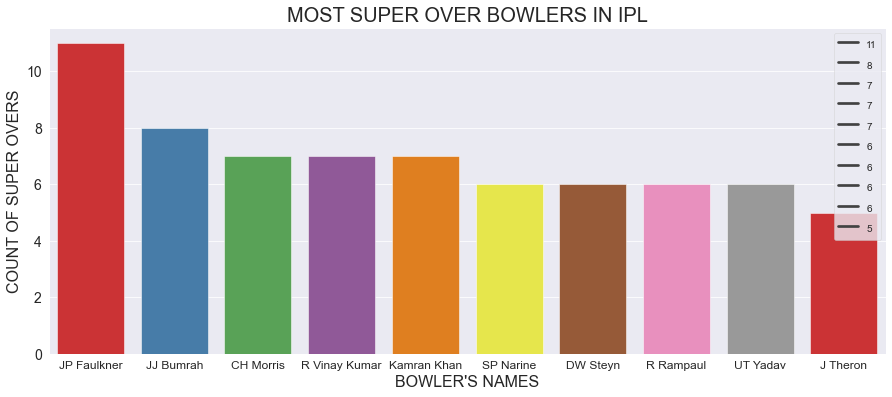

In [52]:
super_over_df = runs_df.groupby("bowler")["is_super_over"].agg("sum").reset_index().sort_values(by="is_super_over",ascending=False)
super_over_df = super_over_df.iloc[:10,:]

#VISUALIZATION
plt.figure(figsize=(15,6))
sns.barplot(x = super_over_df["bowler"], y = super_over_df ["is_super_over"],data = super_over_df ,palette="Set1")
plt.title("MOST SUPER OVER BOWLERS IN IPL",fontsize=20)
plt.xlabel("BOWLER'S NAMES",fontsize=16)
plt.ylabel("COUNT OF SUPER OVERS",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation="horizontal",fontsize=14)
plt.legend(super_over_df["is_super_over"],handlelength=2, handleheight=2)
plt.show()

> Super overs are bowled whenever there is a tie between the scores of both teams. So the **chasing team** the becomes the team to **bat first** and the defending team **bowls first** in the **SUPER OVER**.
- Each team is given 6 balls to play and the one that chases has to score 1 more run than the target total in super over to win the match.
- Bowling the super over is an absolute important task because you dont want the opposite team to score many runs in just 6 balls.
- From the chart we  see that **JAMES FAULKNER** has bowled the most number of super overs with **11 overs** to his name.
- Followed by him with **8 super overs** is **Jasprit Bumrah**.

### 17) BOWLERS WHO HAVE GIVEN MOST EXTRA RUNS

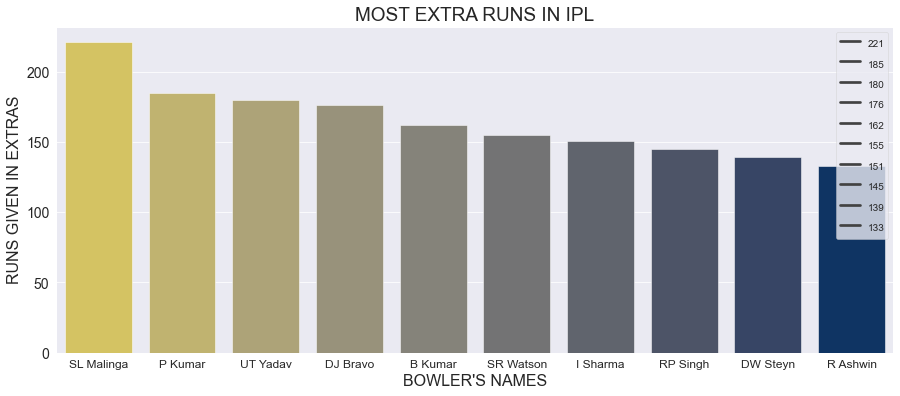

In [53]:
most_extra_runs_df = runs_df.groupby("bowler")["extra_runs"].agg(lambda x: (x>0).sum()).reset_index().sort_values(by="extra_runs", ascending=False).reset_index(drop=True)
most_extra_runs_df = most_extra_runs_df.iloc[:10,:] 

#VISUALIZATION
plt.figure(figsize=(15,6))
sns.barplot(x = most_extra_runs_df["bowler"], y = most_extra_runs_df ["extra_runs"],data = most_extra_runs_df ,palette="cividis_r")
plt.title("MOST EXTRA RUNS IN IPL",fontsize=19)
plt.xlabel("BOWLER'S NAMES",fontsize=16)
plt.ylabel("RUNS GIVEN IN EXTRAS",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation="horizontal",fontsize=14)
plt.legend(most_extra_runs_df["extra_runs"],handlelength=2, handleheight=2)
plt.show()


> The most number of extra runs given in IPL is by **LASITH MALINGA**. He has given **221 runs** in the form of extras.
- Followed by him in seocnd place is **Pravin Kumar** who has given 185 extra runs in IPL seasons he has played.

## CONCLUSION

> From the analysis above following things have been found :
- **MUMBAI INDIANS** have been the most successful IPL team to win the trophy as many as 4 times.
- **CHENNAI SUPER KINGS** have been the most veteran team to reach the IPL finals for 8 times out of the 12 IPLs that have been played. They have the most number of experience in playing an IPL Finale.
- **Eden Gardens** has been the most preferred ground to play an IPL match.
- In IPL generally the team winning the toss prefers to "Field first" which states that teams prefer chasing a score rather than defending it.
- **Chris Gayle** is one of the most prolific and experienced batsman as he tops the most 6s hit list as well as the player to win most number of **Man of the match** awards.
- **IPL season 2013** had the most number of IPL matches to witness.
- **Lasith Malinga** is the most successful bowler who has bowled many overs and is the highest wicket taker in IPL history.
- **Suresh Raina** is one of the most reliable and veteran player to play in IPL as we can say he is in both the top 10 list of most 4s and 6s to be hit in IPL which makes him a valuable batsman. We can also see his name in the top 10 fielders list making him a complete team player.
- **MS Dhoni** and **Dinesh Kartik** are some of the best fielders in IPL.    
- So for brand and products promotion 
- 1)you can either do with teams like **Mumbai Indians**,**Chennai Super Kings**,**Kolkata Knight Riders** and **Sunrisers Hyderabad** as they are the most popular teams in IPL and have lots of star players in their teams.
- 2)or go for players like **Chris Gayle**, **Lasith Malinga**, **Shikhar Dhawan**, **Suresh Raina**,**Virat Kohli**,**MS Dhoni** etc. for this purpose.

### THANK YOU FOR GOING THROUGH MY ANALYSIS WORK.....!!!!!!!!